In [1]:
%%html
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.6/require.min.js"></script>

In [15]:
import pandas as pd

test_data = pd.read_csv(r"C:\Users\a122861569\Desktop\kaggle\titanic\test.csv")
train_data = pd.read_csv(r"C:\Users\a122861569\Desktop\kaggle\titanic\train.csv")
test_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [16]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
查看不同类别分出来的存活人数

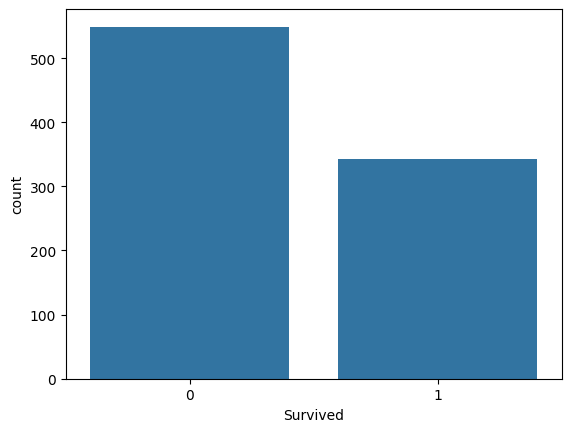

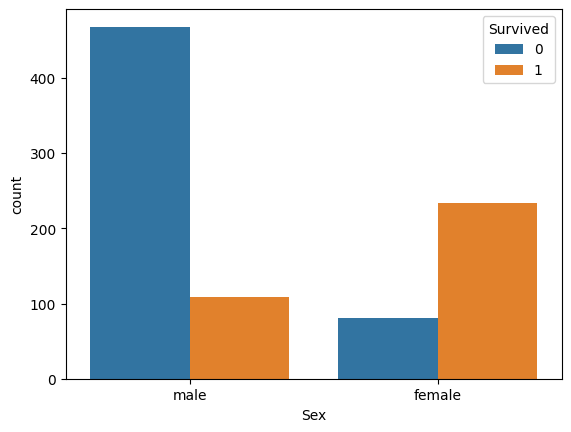

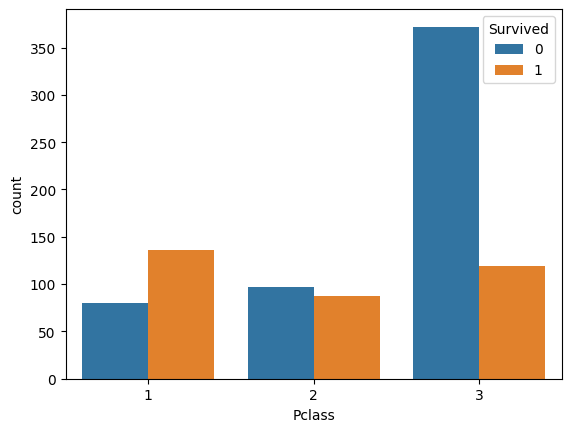

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Survived",data = train_data)
plt.show()

sns.countplot(x="Sex",hue="Survived",data=train_data)
plt.show()

sns.countplot(x="Pclass",hue="Survived",data=train_data)
plt.show()

In [23]:
train_data.isna().sum().sort_values(ascending=False)

Cabin          687
Embarked         2
Pclass           0
Survived         0
PassengerId      0
Sex              0
Name             0
Age              0
SibSp            0
Ticket           0
Parch            0
Fare             0
Has_Cabin        0
dtype: int64

In [25]:
test_data.isna().sum().sort_values(ascending=False)

Cabin          327
PassengerId      0
Name             0
Pclass           0
Sex              0
Age              0
Parch            0
SibSp            0
Ticket           0
Fare             0
Embarked         0
Has_Cabin        0
dtype: int64

In [ ]:
填充age列的空白值，按照性别船舱等级的中位数来填充
填充训练集中的Embarked按照众数填充
测试集中的fare列按照众数填充
创建新的列has_cabin,填充如果有上船记录就是true,反之就是false

In [26]:
train_data["Age"]=train_data.groupby(["Sex","Pclass"])["Age"].transform(lambda x:x.fillna(x.median()))
test_data["Age"]=train_data.groupby(["Sex","Pclass"])["Age"].transform(lambda x:x.fillna(x.median()))
train_data["Embarked"].copy().fillna(train_data["Embarked"].mode()[0], inplace=True)
test_data["Fare"] = test_data["Fare"].fillna(test_data["Fare"].median())
train_data["Has_Cabin"] = train_data["Cabin"].notnull().astype(int)
test_data["Has_Cabin"] = test_data["Cabin"].notnull().astype(int)

In [ ]:
将训练集与测试集中的性别以数值形式映射
对训练集和测试集中的embarked列进行独热编码，如果有多个不同的值则以emb为命名头进行命名
'''假设 Embarked 列有三个不同的值：C（Cherbourg）、Q（Queenstown）和 S（Southampton），则 pd.get_dummies 会将原来的 Embarked 列拆分为三个新的列：

Emb_C：表示 Embarked 是否为 C，如果是 C，则值为 1，否则为 0。

Emb_Q：表示 Embarked 是否为 Q，如果是 Q，则值为 1，否则为 0。

Emb_S：表示 Embarked 是否为 S，如果是 S，则值为 1，否则为 0。'''

In [27]:
train_data["Sex"] = train_data["Sex"].map({"male": 0, "female": 1})
test_data["Sex"] = test_data["Sex"].map({"male": 0, "female": 1})
train_data = pd.get_dummies(train_data, columns=["Embarked"], prefix="Emb")
test_data = pd.get_dummies(test_data, columns=["Embarked"], prefix="Emb")


In [ ]:
创建新列，统计每个家庭的人数

In [28]:
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1


In [ ]:
创建特征集合，删除这几个列
创建训练集和训练目标变量数据，创建测试集特征数据

In [29]:
features = ["Pclass", "Sex", "Age", "Fare", "FamilySize", "Has_Cabin", "Emb_C", "Emb_Q", "Emb_S"]
features.remove("Emb_C")
features.remove("Emb_Q")
features.remove("Emb_S")
features.remove("Has_Cabin")
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

In [ ]:
新增特征列，身份
创建映射集合并进行填充映射，如果没有就映射0

In [31]:
train_data["Title"] = train_data["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
test_data["Title"] = test_data["Name"].str.extract(r" ([A-Za-z]+)\.", expand=False)
title_mapping = {
    "Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4,
    "Dr": 5, "Rev": 5, "Col": 5, "Major": 5, "Mlle": 2, "Ms": 2, "Lady": 6,
    "Countess": 6, "Jonkheer": 6, "Don": 6, "Sir": 6, "Capt": 5, "Mme": 3
}
train_data["Title"] = train_data["Title"].map(title_mapping).fillna(0)
test_data["Title"] = test_data["Title"].map(title_mapping).fillna(0)
features.append("Title")


In [ ]:
进行标准化（随机森林模型一般不用进行标准化，	不依赖特征之间的大小关系），这里是因为习惯了

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train.loc[:,["Age","Fare"]] = scaler.fit_transform(X_train[["Age","Fare"]])
X_test.loc[:, ["Age", "Fare"]] = scaler.transform(X_test[["Age", "Fare"]])


In [ ]:
进行训练树

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
model = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
model.fit(X_train,y_train)
scores = cross_val_score(model, X_train, y_train, cv=11)
print(f"Acurácia média (validação cruzada): {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")


Acurácia média (validação cruzada): 0.828 (+/- 0.086)


In [ ]:
GridSearchCV 是一个用于超参数调优（Hyperparameter Tuning）的工具，它会尝试不同的超参数组合，评估模型的性能，并选择最优的超参数设置。
具体来说，GridSearchCV 会进行 网格搜索，即对传入的超参数进行穷举，尝试每一种组合，并使用交叉验证来评估模型的表现。
cv=5 指定了 交叉验证 (cross-validation) 的折数。这里表示使用 5折交叉验证。交叉验证将数据集划分为 5 个子集，每次训练时使用 4 个子集作为训练集，
 1 个子集作为验证集，重复 5 次，以确保评估结果的稳定性。

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators' : [50,100,200],
    'max_depth' :[3,5,7]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Melhores parâmetros: {grid_search.best_params_}")
model = grid_search.best_estimator_


Melhores parâmetros: {'max_depth': 7, 'n_estimators': 200}


In [37]:
scores = cross_val_score(model, X_train, y_train, cv=11)
print(f"Acurácia média (validação cruzada): {scores.mean():.3f} (+/- {scores.std() * 2:.3f})")

Acurácia média (validação cruzada): 0.841 (+/- 0.083)


In [38]:
predictions = model.predict(X_test)
submission = pd.DataFrame({
    'PassengerId': test_data['PassengerId'],
    'Survived': predictions
})
submission.to_csv('submission.csv', index=False)
print("Arquivo de submissão criado: submission.csv")


Arquivo de submissão criado: submission.csv
